In [1]:
import numpy as np
from tvolib import mpl_utils as mu

from rls.models import HyperbolicGradientModel

model = HyperbolicGradientModel()

x = 0.2 * np.linspace(-3, 3, 1000) * model.R.code
z = np.linspace(-3, 3, 1000) * model.R.code
X, Z = np.meshgrid(x, z, indexing="ij")

# Profile along the parallel coordinate

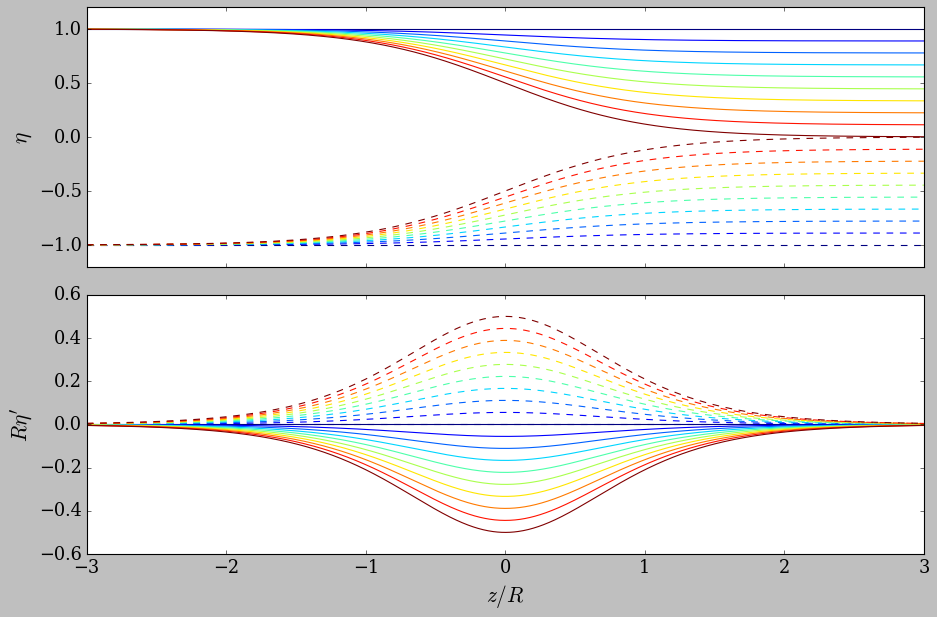

In [2]:
fig, axes = mu.plt.subplots(2, 1, sharex=True, figsize=(12, 8))

Bhs = np.linspace(0, 1, 10)
colors = mu.plt.cm.jet(np.linspace(0, 1, Bhs.size))
for (i, Bh) in enumerate(Bhs):
    model = HyperbolicGradientModel(Bh=Bh, B0=1.0)
    R = model.R.code
    B0 = model.B0.code
    Bz = B0 * model.eta(z, *model.field_args)
    dBz = R * B0 * model.d_eta(z, *model.field_args)
    axes[0].plot(z / R, Bz, c=colors[i], ls="-")
    axes[1].plot(z / R, dBz, c=colors[i], ls="-")

    model = HyperbolicGradientModel(Bh=-Bh, B0=-1.0)
    R = model.R.code
    B0 = model.B0.code
    Bz = B0 * model.eta(z, *model.field_args)
    dBz = R * B0 * model.d_eta(z, *model.field_args)
    axes[0].plot(z / R, Bz, c=colors[i], ls="--")
    axes[1].plot(z / R, dBz, c=colors[i], ls="--")
    
axes[0].set_ylim(-1.2, 1.2)
axes[0].set_ylabel("$\eta$")
axes[1].set_ylabel("$R\eta'$")
axes[1].set_xlabel("$z/R$")
fig.tight_layout()

mu.plt.show()

# 2D profile (positive B0)

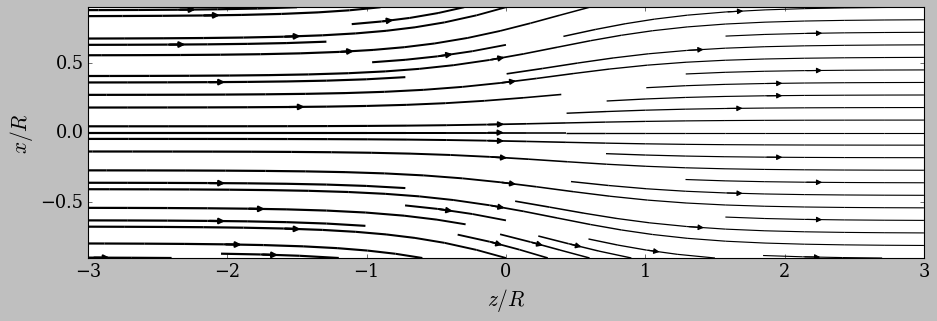

In [3]:
model = HyperbolicGradientModel(Bh=0.5, B0=1.0)
R = model.R.code
B0 = model.B0.code

x = 0.3 * R * np.linspace(-3, 3, 1000)
z = R * np.linspace(-3, 3, 1000)
X, Z = np.meshgrid(x, z, indexing="ij")
Y = np.zeros_like(X)
_, _, _, B0_x, _, B0_z = model.field(0.0, X, Y, Z, *model.field_args)
B0_mag = np.sqrt(B0_x**2 + B0_z**2)

fig, ax = mu.plt.subplots(1, 1, figsize=(12, 8))
skw = dict(color="k", density=0.7, linewidth=B0_mag / B0_mag.min())

ax.streamplot(Z / R, X / R, B0_z, B0_x, **skw)

ax.set_xlim((Z / R).min(), (Z / R).max())
ax.set_ylim((X / R).min(), (X / R).max())
ax.set_ylabel("$x/R$")
ax.set_xlabel("$z/R$")
ax.set_aspect("equal")

fig.tight_layout()
mu.plt.show()

# 2D profile (negative B0)

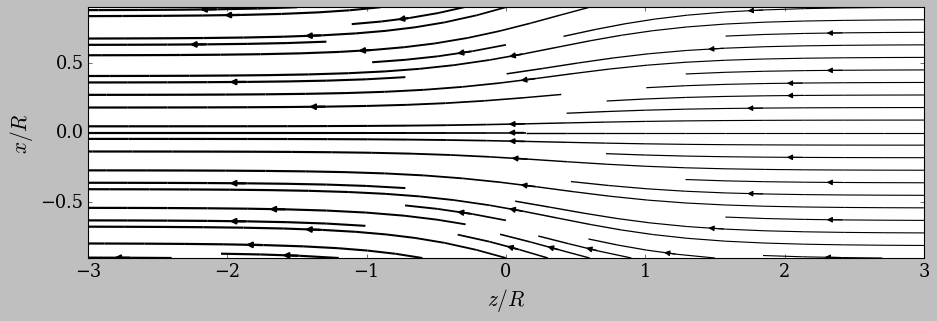

In [4]:
model = HyperbolicGradientModel(Bh=-0.5, B0=-1.0)
R = model.R.code
B0 = model.B0.code

x = 0.3 * R * np.linspace(-3, 3, 1000)
z = R * np.linspace(-3, 3, 1000)
X, Z = np.meshgrid(x, z, indexing="ij")
Y = np.zeros_like(X)
_, _, _, B0_x, _, B0_z = model.field(0.0, X, Y, Z, *model.field_args)
B0_mag = np.sqrt(B0_x**2 + B0_z**2)

fig, ax = mu.plt.subplots(1, 1, figsize=(12, 8))
skw = dict(color="k", density=0.7, linewidth=B0_mag / B0_mag.min())

ax.streamplot(Z / R, X / R, B0_z, B0_x, **skw)

ax.set_xlim((Z / R).min(), (Z / R).max())
ax.set_ylim((X / R).min(), (X / R).max())
ax.set_ylabel("$x/R$")
ax.set_xlabel("$z/R$")
ax.set_aspect("equal")

fig.tight_layout()
mu.plt.show()

# Phase space mapping

Here, we see how the pitch angle transforms along the parallel (z) coordinate. Energy and magnetic moment are conserved in this field

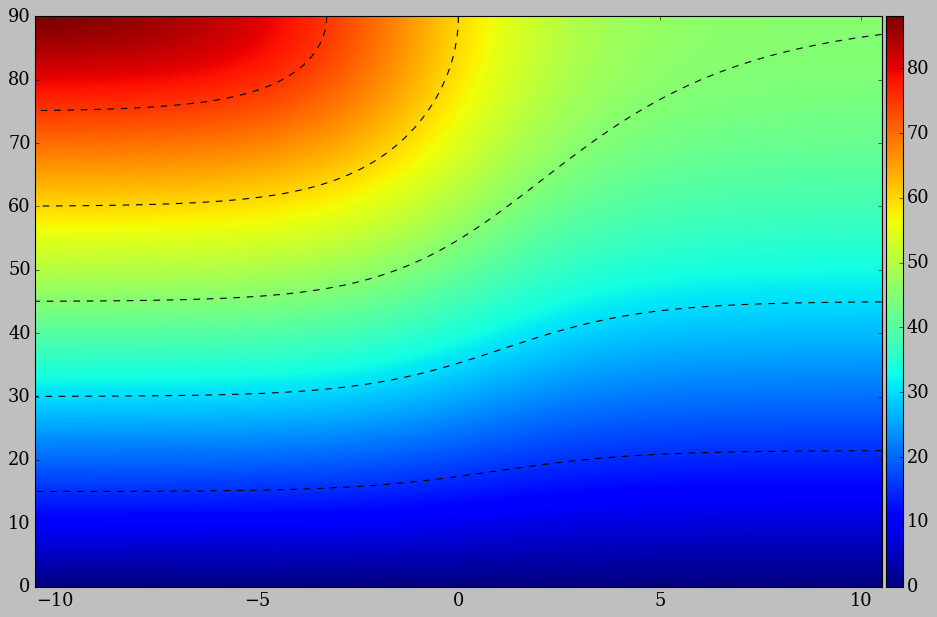

In [5]:
model = HyperbolicGradientModel(Bh=0.5, B0=1.0)

z = np.linspace(-3, 3, 1000) * model.R.code
alpha_0 = np.linspace(0, np.pi / 2, 1000)
Zg, Ag = np.meshgrid(z, alpha_0, indexing="ij")
A = np.arctan2(
    np.sqrt(model.eta(Zg, *model.field_args)) * np.sin(Ag),
    np.sqrt(np.cos(Ag)**2 + (1 - model.eta(Zg, *model.field_args)) * np.sin(Ag)**2)
)

fig, ax = mu.plt.subplots(1, 1, figsize=(12, 8))

cax = mu.add_colorbar(ax)
ax.contour(Zg, np.degrees(Ag), np.degrees(A), linestyles="--", colors="k")
im = ax.pcolormesh(Zg, np.degrees(Ag), np.degrees(A))
fig.colorbar(im, cax=cax)

ax.set_xlim(Zg.min(), Zg.max())
ax.set_ylim(np.degrees(Ag.min()), np.degrees(Ag.max()))

fig.tight_layout()
mu.plt.show()